<a href="https://colab.research.google.com/github/timarkanta/DLFS_code/blob/master/SIG742_Assessment_2_Group41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><font color='#ADD8E6'>Deakin University</font></center></h1>

<center><font color='#ADD8E6'>SIG742: Modern Data Science</font></center>

<font color='#ADD8E6'>**Submitted by**</font>

**Student name :** Timarkanta Sharma

**Deakin id :** 223915207

**Attempt** #1

**Date :** 02/09/2023

Target Grade :**HD**

**Part I**

**Data Acquisition and Manipulation**

There are 10 questions in this part for total 60 marks, and each question is for 5 marks. The quality of
your explanation in the report and video will be 10 marks for all questions.
You are required to use Google Colab to finish all the coding in the code block cell, and provide
sufficient coding comments, and also save the result of running as well.
The (Item_listing_category.zip) data used for this part could be found in here. You will need to use
Pandas to read the unzipped (csv) data for starting.


**Question 1.1**


**Find the missing values:**

**• Write the function missing_values_table and use the dataframe as the input. The function should return the information of missing values by column (only for columns which have missing values and the returned value should be the count of rows has missing values);**


In [ ]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def read_csv_from_zip(zip_path):
    """
    Reads a CSV file from a ZIP archive and returns it as a Pandas DataFrame.
     """
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Extract the CSV file
        csv_filename = zip_ref.namelist()[0]

        # Read the CSV directly without extracting
        df = pd.read_csv(zip_ref.open(csv_filename))

    return df


zip_file_path = '/content/drive/MyDrive/Colab Notebooks/item_listing_category.zip'
df = read_csv_from_zip(zip_file_path)

print(df.head())  # Print first 5 rows of the DataFrame


   train_id                            name  item_condition_id  \
0    128037        Bundle for Sassy Sisters                  3   
1    491755                    PINK VS TANK                  2   
2    470924      Funko Pop Unmasked Cyclops                  1   
3    491263                 Baby Roshe Runs                  3   
4    836489  Baby Girl Ralph Lauren dresses                  3   

                        category_name    brand_name  price  shipping  \
0         Women/Tops & Blouses/Blouse           NaN   16.0         0   
1     Women/Tops & Blouses/Tank, Cami           NaN   17.0         0   
2  Kids/Toys/Action Figures & Statues         Funko   30.0         1   
3               Kids/Boys 2T-5T/Shoes          Nike   19.0         0   
4         Kids/Girls 0-24 Mos/Dresses  Ralph Lauren   24.0         0   

                                   clean_description  
0  max cleo black dress paper crane black tank to...  
1       sequin pink sign sequins missing gently worn  
2  bo

In [ ]:
df.shape

(355808, 8)

In [ ]:
df.describe()

,train_id,item_condition_id,price,shipping
count,3.558080e+05,355808.000000,355808.000000,355808.000000
mean,5.931105e+05,1.910128,26.661885,0.446151
std,3.425195e+05,0.904000,38.146767,0.497092
min,1.000000e+00,1.000000,0.000000,0.000000
25%,2.965082e+05,1.000000,10.000000,0.000000
50%,5.932885e+05,2.000000,17.000000,0.000000
75%,8.904722e+05,3.000000,29.000000,1.000000
max,1.186024e+06,5.000000,2000.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355808 entries, 0 to 355807
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           355808 non-null  int64  
 1   name               355808 non-null  object 
 2   item_condition_id  355808 non-null  int64  
 3   category_name      354269 non-null  object 
 4   brand_name         203852 non-null  object 
 5   price              355808 non-null  float64
 6   shipping           355808 non-null  int64  
 7   clean_description  355614 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 21.7+ MB


In [ ]:
def missing_values_table(df):
    """
    Returns a table with columns having missing values along with the count
    of missing values for each of those columns. Additionally, returns the
    count of rows with any missing values.
    """
    # Calculate number of missing values per column
    mis_val_per_column = df.isnull().sum()

    # Filter out columns without missing values
    mis_val_per_column = mis_val_per_column[mis_val_per_column > 0]

    # Convert the series to a DataFrame for better presentation
    mis_val_table = pd.DataFrame(mis_val_per_column, columns=['Missing Values'])

    # Calculate the number of rows having at least one missing value
    rows_with_missing = df.isnull().any(axis=1).sum()

    return mis_val_table, rows_with_missing

missing_cols, missing_rows_count = missing_values_table(df)
print(missing_cols)
print(f"Total rows with missing values: {missing_rows_count}")


                   Missing Values
category_name                1539
brand_name                 151956
clean_description             194
Total rows with missing values: 152700


**• For columns which have missing values, could you impute the missing values with the mean value of the particular columns? (if you think it could not be done with mean value, write down the reason in comments and report rather than code)**


From the given dataset **category_name , brand_name, clean_description** columns have missing value.

For the given dataset, imputing missing values with the mean makes sense for columns with numerical data types. However, for columns with non-numeric (object) data types, imputing with the mean is not appropriate.

From the given dataset structure, we can see:

**category_name**, **brand_name**, and **clean_description** are non-numeric columns (they have **object** dtype). Imputing these columns with the mean doesn't make sense as they are textual data. For such columns, common strategies include filling missing values with the most frequent value (mode)
There's no numeric column with missing values in the provided dataset structure.

**Question 1.2**

**Find the price information from the data:**

**• Write code to print the median price of the items in the data**

In [ ]:
median_price = df['price'].median()
print(f"The median price of the items is: {median_price}")

The median price of the items is: 17.0


**• What is the 90th percentile value on the price**

In [ ]:
# Use the quantile() method on the 'price' column to compute the 90th percentile
# The argument 0.90 passed to quantile() indicates we want the 90th percentile
percentile_90_price = df['price'].quantile(0.90)

# Print the result
print(f"The 90th percentile value of the price is: {percentile_90_price}")

The 90th percentile value of the price is: 51.0


**• Draw the histogram chart for the price of the items in the data with 50 bins.**


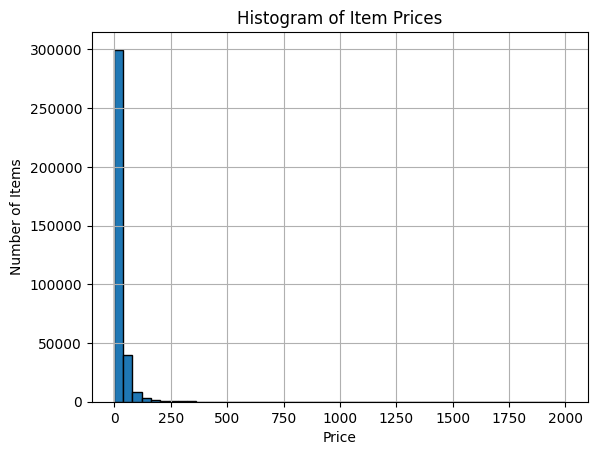

In [ ]:
# Assuming df is your dataframe

# Plotting the histogram using the hist() method from pandas' DataFrame
# The argument bins=50 indicates we want 50 bins in the histogram
df['price'].hist(bins=50, edgecolor='black')

# Adding title and labels
plt.title('Histogram of Item Prices')
plt.xlabel('Price')
plt.ylabel('Number of Items')

# Display the histogram
plt.show()

**Question 1.3**

**Exploring the shipping information from the data:**

**• Write code to find out the percentage of the items that are paid by the buyers.**

"paid by the buyers"  mean items for which shipping is paid by the buyers, we can make an assumption based on the given information. If the shipping column indicates who pays for the shipping (e.g., 1 for buyer-paid and 0 for seller-paid), then the percentage of items paid for shipping by the buyers can be found as follows:

In [ ]:
# Calculate the number of items where shipping is paid by the buyer
buyer_paid_shipping = df[df['shipping'] == 1].shape[0]

# Calculate the total number of items in the dataframe
total_items = df.shape[0]

# Calculate the percentage of items where shipping is paid by the buyer
percentage_paid_by_buyer = (buyer_paid_shipping / total_items) * 100

print(f"Percentage of items where shipping is paid by the buyer: {percentage_paid_by_buyer:.2f}%")


Percentage of items where shipping is paid by the buyer: 44.62%


**• Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer pays shipping (50 bins).**

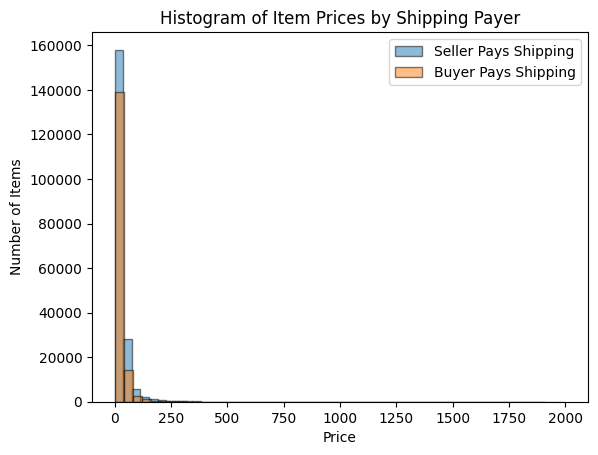

In [ ]:
# Filter data for items where shipping is paid by the seller (assuming 0 means seller pays)
seller_pays = df[df['shipping'] == 0]['price']

# Filter data for items where shipping is paid by the buyer (assuming 1 means buyer pays)
buyer_pays = df[df['shipping'] == 1]['price']

# Plot histograms for both groups on the same plot
plt.hist(seller_pays, bins=50, alpha=0.5, label='Seller Pays Shipping', edgecolor='black')
plt.hist(buyer_pays, bins=50, alpha=0.5, label='Buyer Pays Shipping', edgecolor='black')

# Adding title, labels, and legend
plt.title('Histogram of Item Prices by Shipping Payer')
plt.xlabel('Price')
plt.ylabel('Number of Items')
plt.legend(loc='upper right')

# Display the histogram
plt.show()


**• When buying the items online, do you need to pay higher price if seller pays for the shipping? Write the code to find out (Compare the median price of items paid by buyers and items paid by sellers, and explain the result in the comment and report).**

In [ ]:
# Compute the median price for items where the seller pays for shipping (assuming 0 means seller pays)
median_price_seller_pays = df[df['shipping'] == 0]['price'].median()

# Compute the median price for items where the buyer pays for shipping (assuming 1 means buyer pays)
median_price_buyer_pays = df[df['shipping'] == 1]['price'].median()

# Print out the results
print(f"Median price when seller pays for shipping: ${median_price_seller_pays:.2f}")
print(f"Median price when buyer pays for shipping: ${median_price_buyer_pays:.2f}")

# Compare the medians and comment on the result
if median_price_seller_pays > median_price_buyer_pays:
    print("Items tend to be pricier when the seller pays for shipping.")
elif median_price_seller_pays < median_price_buyer_pays:
    print("Items tend to be pricier when the buyer pays for shipping.")
else:
    print("There's no significant difference in the median prices based on who pays for shipping.")


Median price when seller pays for shipping: $19.00
Median price when buyer pays for shipping: $14.00
Items tend to be pricier when the seller pays for shipping.


**Median Price Analysis**:

Median price when the seller pays for shipping: **19.00**

Median price when the buyer pays for shipping: **14.00**

**Conclusion:**

Items are observed to be **pricier**, on average, when the seller is responsible for the shipping costs. Specifically, the median price is $5.00 higher when the seller pays for the shipping compared to when the buyer does.


**Question 1.4**


**You are required to find out the item condition information from the data. Lower the number (value), the better condition of the item.**

**• Write the code to find out (print) the count of the rows on each number (value) in column item_condition_id.**

In [ ]:
# Get unique values from the 'item_condition_id' column
unique_values = df['item_condition_id'].unique()

# Print unique values
print("Unique values in item_condition_id:", sorted(unique_values))

# Use the value_counts() method on the 'item_condition_id' column to get the count of rows for each unique value
item_condition_counts = df['item_condition_id'].value_counts()

# Print the counts
print("\nCounts for each value:")
print(item_condition_counts.sort_index())  # Sorting by index (value of item_condition_id)


Unique values in item_condition_id: [1, 2, 3, 4, 5]

Counts for each value:
1    153402
2     89843
3    104248
4      7768
5       547
Name: item_condition_id, dtype: int64


**• Draw the boxplot graphs (one plot) on the price for each item condition value, and find out whether the better condition of the item could have higher median price (draw the plot and answer this question in the comment and report).**


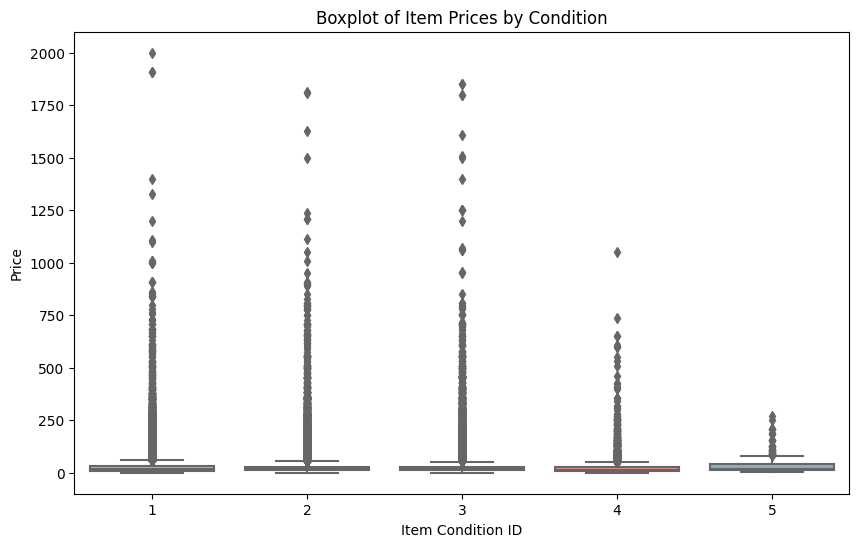

In [ ]:
# Create a boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='item_condition_id', y='price', data=df, palette="Set3")

# Adding title and labels
plt.title('Boxplot of Item Prices by Condition')
plt.xlabel('Item Condition ID')
plt.ylabel('Price')

# Display the boxplot
plt.show()

In general, as the item's condition gets worse (from ID 1 to 4), the median price seems to decrease. This implies that better condition items tend to have higher prices.

However, the trend breaks at the worst condition (ID 5), which has the highest median price.

Below is the median price for each item_condition_id

In [ ]:
# Group by 'item_condition_id' and compute the median for the 'price' column
median_prices_by_condition = df.groupby('item_condition_id')['price'].median()

# Print the median prices for each item condition
print(median_prices_by_condition)

item_condition_id
1    18.0
2    17.0
3    16.0
4    15.0
5    19.0
Name: price, dtype: float64


As mentioned in question Lower the number (value), the better condition of the item, we can see item condition with lower value have higher price.
Item Condition    Price range
    1                  
 From above boc plot we can see better condition of the item could have higher median price

**Question 1.5**

**Conduct the category analysis and find out the relevant information:**

**• Write the code to find out (print) how many unique categories you could find from column category_name.**


In [ ]:
# nunique() method on the 'category_name' column to get the number of unique categories
unique_categories_count = df['category_name'].nunique()

# Print the number of unique categories
print(f"There are {unique_categories_count} unique categories in the 'category_name' column.")

There are 1135 unique categories in the 'category_name' column.


**• For the items with worst condition only (highest value from item_condition_id), write code to (print) find out the top 3 categories (now you probably understand the findings you had in Question 1.4).**

In [ ]:
# Filter the dataframe for items with the worst condition
worst_condition_items = df[df['item_condition_id'] == df['item_condition_id'].max()]

worst_condition_value = df['item_condition_id'].max()

# Print the worst condition
print(f"The worst condition in the 'item_condition_id' column is: {worst_condition_value}")
print()
# Find out the top 3 categories for these items
top_3_categories = worst_condition_items['category_name'].value_counts().head(3)

# Print the top 3 categories and their counts
print(top_3_categories)

The worst condition in the 'item_condition_id' column is: 5

Electronics/Cell Phones & Accessories/Cell Phones & Smartphones    137
Electronics/Video Games & Consoles/Games                            42
Electronics/Video Games & Consoles/Consoles                         35
Name: category_name, dtype: int64


**Question 1.6**

**The categories in column category_name have 3 parts. The three parts (main_cat,subcat_1 and subcat_2) are concatenated with ’/’ character sequentially in the data now.**

**• Write the function (must be function) to split the text content (string value in each row) in column category_name by ’/’ character. you need to handle the exception in the function for those has missing values (NaN). For missing values (NaN), the results from splitting should be ”Category Unknown”, ”Category Unknown”, ”Category Unknown”.**

**• Use the above function you wrote to create three new columns main_cat,subcat_1 and subcat_2 with corresponding values from the result of splitting. Print out the dataframe to show the top 5 rows for three new columns main_cat,subcat_1 and subcat_2.**


In [ ]:
import pandas as pd

def split_categories(category):
    # Handle missing values
    if pd.isnull(category):
        return "Category Unknown", "Category Unknown", "Category Unknown"

    # Split the category into parts based on '/'
    parts = category.split('/')

    # If the category doesn't have all three parts, pad the list with "Category Unknown"
    while len(parts) < 3:
        parts.append("Category Unknown")

    return parts[0], parts[1], parts[2]

# Assuming df is your dataframe
# Apply the function and assign results to new columns
df['main_cat'], df['subcat_1'], df['subcat_2'] = zip(*df['category_name'].apply(split_categories))

# You can now print or view the head of the dataframe to check the result
print(df[['category_name' ,'main_cat', 'subcat_1', 'subcat_2']].head())


                        category_name main_cat        subcat_1  \
0         Women/Tops & Blouses/Blouse    Women  Tops & Blouses   
1     Women/Tops & Blouses/Tank, Cami    Women  Tops & Blouses   
2  Kids/Toys/Action Figures & Statues     Kids            Toys   
3               Kids/Boys 2T-5T/Shoes     Kids      Boys 2T-5T   
4         Kids/Girls 0-24 Mos/Dresses     Kids  Girls 0-24 Mos   

                   subcat_2  
0                    Blouse  
1                Tank, Cami  
2  Action Figures & Statues  
3                     Shoes  
4                   Dresses  


**Question 1.7**

**After splitting the category for column category_name, we now have the three main details regarding to the category information. However, we need to clean the text in each of the new three columns in lowercase.**

**• Write code (or function) to change the text (value in each row) from the new three columns to lowercase.**

In [ ]:
def convert_columns_to_lowercase(main_cat, subcat_1, subcat_2):
    """
    Convert the values of the given Series objects to lowercase.

    Args:
    - main_cat (pd.Series): Series representing the 'main_cat' column.
    - subcat_1 (pd.Series): Series representing the 'subcat_1' column.
    - subcat_2 (pd.Series): Series representing the 'subcat_2' column.

    Returns:
    - tuple of pd.Series: Lowercase versions of the input Series.
    """
    return main_cat.str.lower(), subcat_1.str.lower(), subcat_2.str.lower()

# Assuming df is your dataframe
df['main_cat'], df['subcat_1'], df['subcat_2'] = convert_columns_to_lowercase(df['main_cat'], df['subcat_1'], df['subcat_2'])

# You can now print or view the head of the dataframe to check the result
print(df[['main_cat', 'subcat_1', 'subcat_2']].head())


  main_cat        subcat_1                  subcat_2
0    women  tops & blouses                    blouse
1    women  tops & blouses                tank, cami
2     kids            toys  action figures & statues
3     kids      boys 2t-5t                     shoes
4     kids  girls 0-24 mos                   dresses


**• Draw the bar chart to find out the top 5 most popular main categories (in column main_cat) in the data (only showing the top 5).**

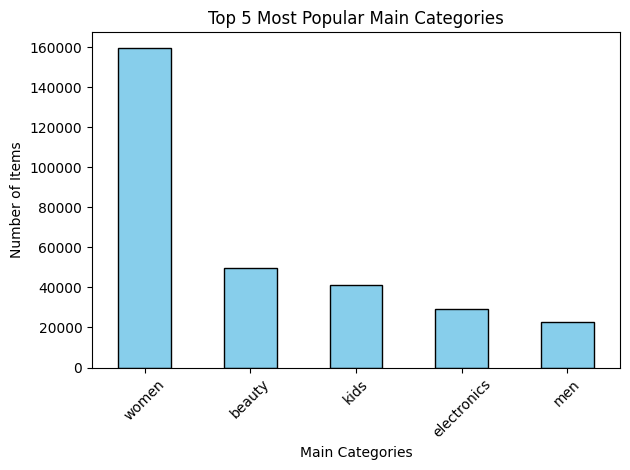

In [ ]:
# Get counts of each category in main_cat
category_counts = df['main_cat'].value_counts()

# Pick the top 5 categories
top_5_categories = category_counts.head(5)

# Plot the bar chart
top_5_categories.plot(kind='bar', color='skyblue', edgecolor='black')

# Title and labels
plt.title('Top 5 Most Popular Main Categories')
plt.xlabel('Main Categories')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)  # Rotate x labels for better visibility if needed

# Display the plot
plt.tight_layout()
plt.show()


**• Write code (or function) to (print) find out how many unique main categories (in column main_cat), unique first sub-categories (in column subcat_1) and unique second sub-categories (in column subcat_2) respectively.**

In [ ]:
def count_unique_categories(df):
    """
    Print the count of unique categories in 'main_cat', 'subcat_1', and 'subcat_2' columns.

    Args:
    - df (DataFrame): The input dataframe with the columns 'main_cat', 'subcat_1', and 'subcat_2'.

    """
    main_cat_unique = df['main_cat'].nunique()
    subcat_1_unique = df['subcat_1'].nunique()
    subcat_2_unique = df['subcat_2'].nunique()

    print(f"Number of unique main categories: {main_cat_unique}")
    print(f"Number of unique first sub-categories: {subcat_1_unique}")
    print(f"Number of unique second sub-categories: {subcat_2_unique}")

# Assuming df is your dataframe
count_unique_categories(df)


Number of unique main categories: 11
Number of unique first sub-categories: 114
Number of unique second sub-categories: 788


**Question 1.8**


**Exploring the price and categories.**


**• Write code to (print) find out the median price for all the categories in new column main_cat.**


In [ ]:
# Group by main_cat and calculate median for the price column
median_prices = df.groupby('main_cat')['price'].median()
print(median_prices)

main_cat
beauty                    15.0
category unknown          18.0
electronics               15.0
handmade                  12.0
home                      18.0
kids                      14.0
men                       21.0
other                     14.0
sports & outdoors         16.0
vintage & collectibles    16.0
women                     19.0
Name: price, dtype: float64


**• Draw the bar chart to find out the top 10 most expensive first sub-categories (in column subcat_1) in the data.**


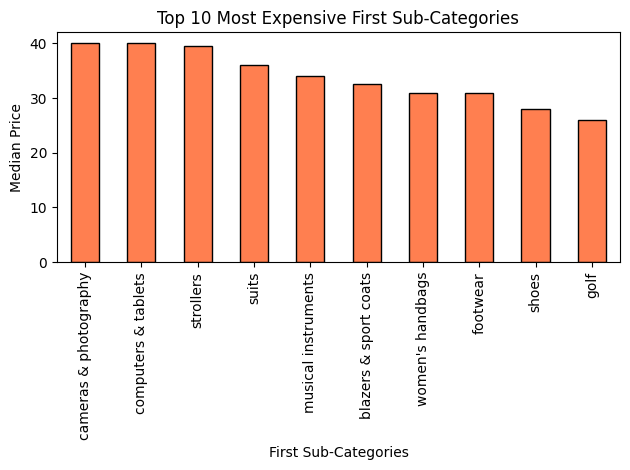

In [ ]:
# Group by subcat_1 and compute the median price for each sub-category
median_prices_subcat1 = df.groupby('subcat_1')['price'].median()

# Sort in descending order and take the top 10
top_10_expensive_subcat1 = median_prices_subcat1.sort_values(ascending=False).head(10)

# Plot the bar chart
top_10_expensive_subcat1.plot(kind='bar', color='coral', edgecolor='black')

# Title and labels
plt.title('Top 10 Most Expensive First Sub-Categories')
plt.xlabel('First Sub-Categories')
plt.ylabel('Median Price')
plt.xticks

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
top_10_expensive_subcat1

subcat_1
cameras & photography    40.0
computers & tablets      40.0
strollers                39.5
suits                    36.0
musical instruments      34.0
blazers & sport coats    32.5
women's handbags         31.0
footwear                 31.0
shoes                    28.0
golf                     26.0
Name: price, dtype: float64

**• Draw the bar chart to find out the top 10 cheapest second sub-categories (in column subcat_2) in the data.**

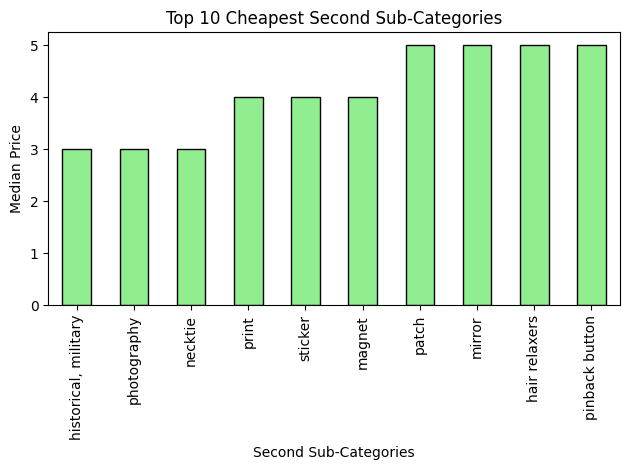

In [ ]:
# Group by subcat_2 and compute the median price for each sub-category
median_prices_subcat2 = df.groupby('subcat_2')['price'].median()

# Sort in ascending order and pick the top 10 cheapest
top_10_cheapest_subcat2 = median_prices_subcat2.sort_values().head(10)

# Plot the bar chart
top_10_cheapest_subcat2.plot(kind='bar', color='lightgreen', edgecolor='black')

# Title and labels
plt.title('Top 10 Cheapest Second Sub-Categories')
plt.xlabel('Second Sub-Categories')
plt.ylabel('Median Price')
plt.xticks

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
top_10_cheapest_subcat2

subcat_2
historical, military    3.0
photography             3.0
necktie                 3.0
print                   4.0
sticker                 4.0
magnet                  4.0
patch                   5.0
mirror                  5.0
hair relaxers           5.0
pinback button          5.0
Name: price, dtype: float64

**Question 1.9**


**Exploring the price and brand.**

• Write code to (print) find out the median price for all the brands (fill NaN with ’brand unavailable’).


In [ ]:
# Fill NaN values in brand_name with 'brand unavailable'
df['brand_name'].fillna('brand unavailable', inplace=True)

# Group by brand_name and compute the median price for each brand
median_prices_by_brand = df.groupby('brand_name')['price'].median()

In [ ]:
median_prices_by_brand.head(10)

brand_name
% Pure                  14.0
10.Deep                 18.0
21men                   10.0
3.1 Phillip Lim        232.5
3M®                     15.0
47 Brand                11.5
5.11 Tactical           28.0
5th & Ocean             20.0
7 For All Mankind®      24.0
90 Degree By Reflex     12.5
Name: price, dtype: float64

**• Draw the bar chart to find out the top 10 most popular brands in the data.**


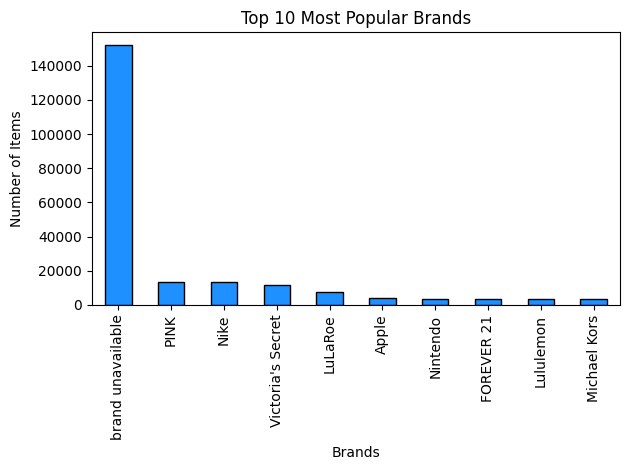

In [ ]:
# Count the occurrences of each brand
brand_counts = df['brand_name'].value_counts()

# Pick the top 10 most popular brands
top_10_popular_brands = brand_counts.head(10)

# Plot the bar chart
top_10_popular_brands.plot(kind='bar', color='dodgerblue', edgecolor='black')

# Title and labels
plt.title('Top 10 Most Popular Brands')
plt.xlabel('Brands')
plt.ylabel('Number of Items')
plt.xticks

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
top_10_popular_brands

brand unavailable    151956
PINK                  13376
Nike                  13182
Victoria's Secret     11544
LuLaRoe                7272
Apple                  3962
Nintendo               3632
FOREVER 21             3610
Lululemon              3536
Michael Kors           3360
Name: brand_name, dtype: int64

**Question 1.10**


**Item Description Analysis**

**• Could you draw the wordcloud chart by using the column clean_description.**

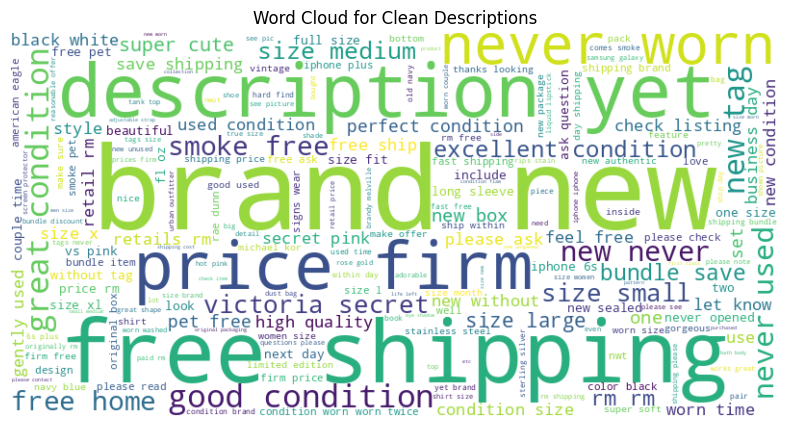

In [ ]:
# Combine all descriptions into one big text
text = ' '.join(description for description in df['clean_description'].dropna())

# Set up the word cloud object
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Clean Descriptions')
plt.show()


**• Divide the data with quantiles of the price (using qcut from pandas to obtain the first/second/third/fourth quantile).**


In [ ]:
# Use qcut to categorize each row into a quantile
df['price_quantile'] = pd.qcut(df['price'], q=4, labels=['first', 'second', 'third', 'fourth'])

# Display the counts for each quantile
print(df['price_quantile'].value_counts().sort_index())


first     90275
second    91203
third     86464
fourth    87866
Name: price_quantile, dtype: int64


**• Draw the wordcould by using the column clean_description on each quantile of price data.**


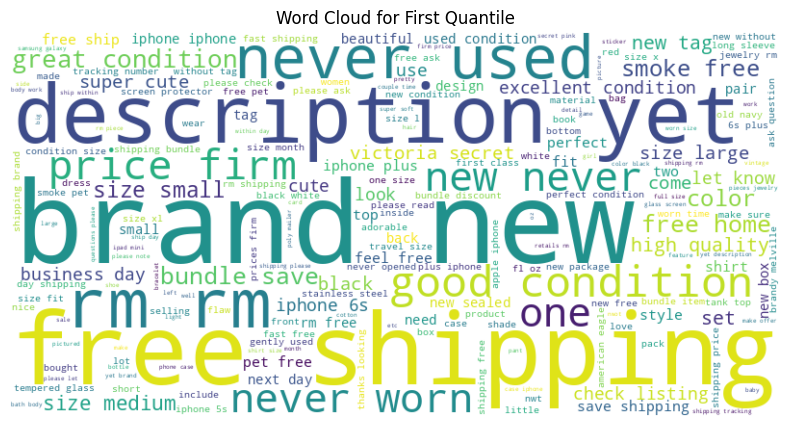

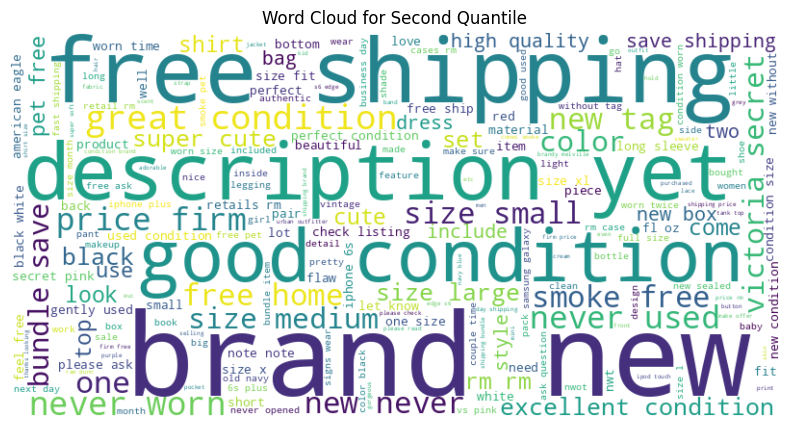

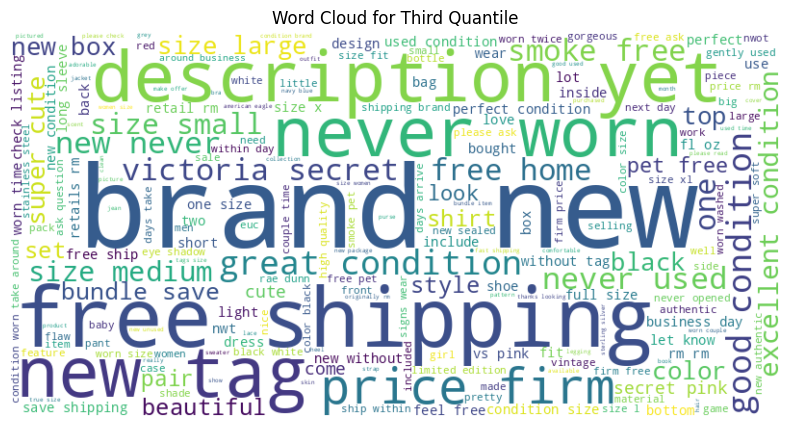

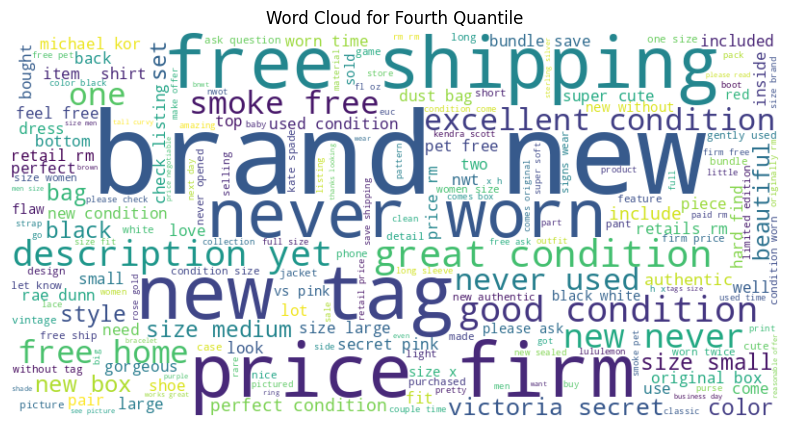

In [ ]:
def generate_wordcloud_for_quantile(quantile_label):
    # Filter descriptions for the given quantile
    text = ' '.join(description for description in df[df['price_quantile'] == quantile_label]['clean_description'].dropna())

    # Generate word cloud
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)

    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {quantile_label.capitalize()} Quantile')
    plt.show()

# Generate word clouds for each quantile
for quantile in ['first', 'second', 'third', 'fourth']:
    generate_wordcloud_for_quantile(quantile)


**Part II**

**Time series analysis exercise**

There are 3 questions in this part for total 40 marks, and each question is for 10 marks. The quality of your explanation in the report and video will be 10 marks for all questions.

You are required to use Google Colab to finish all the coding in the code block cell, and provide sufficient coding comments, and also save the result of running as well.

The (nyc_taxi.csv) data used for this part could be found in this link. You will need to use Pandas to read the csv data for starting.


**Question 2.1**

The dataset used here is the New York City Taxi Demand dataset. The raw data is from the NYC Taxi and Limousine Commission. The data included here consists of aggregating the total number of taxi passengers into 30 minute buckets. In this question, we will simply process the data and explore the time series.

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [ ]:
#Load the dataset into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nyc_taxi.csv')

In [ ]:
data.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [ ]:
data.shape

(10320, 2)

In [ ]:
#dataframe is named data and it has a column 'timestamp' and 'value'
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [ ]:
data.head()


,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


**• Create two new dataframes df_day and df_hour by aggregating the demand value on daily and hourly level.**

In [ ]:
# Resample to hourly
df_hour = data.resample('H', on='timestamp').sum()

# Resample to daily
df_day = data.resample('D', on='timestamp').sum()

# Resetting index to have timestamp as a regular column
df_hour = df_hour.reset_index()
df_day = df_day.reset_index()

In [ ]:
df_hour.head()

,timestamp,value
0,2014-07-01 00:00:00,18971
1,2014-07-01 01:00:00,10866
2,2014-07-01 02:00:00,6693
3,2014-07-01 03:00:00,4433
4,2014-07-01 04:00:00,4379


In [ ]:
df_day.head()

,timestamp,value
0,2014-07-01,745967
1,2014-07-02,733640
2,2014-07-03,710142
3,2014-07-04,552565
4,2014-07-05,555470


• Plot the demand value in two line charts for both df_day and df_hour dataframes.

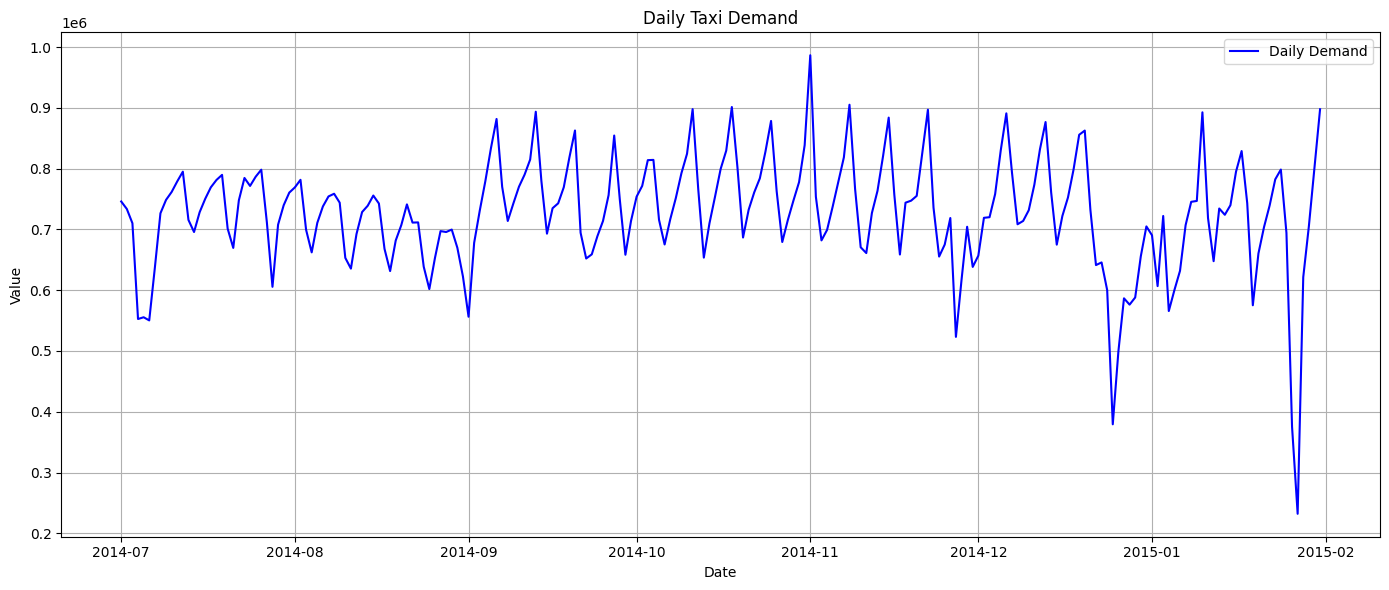

In [ ]:
# Plot for daily aggregated data
plt.figure(figsize=(14, 6))
plt.plot(df_day['timestamp'], df_day['value'], label="Daily Demand", color="blue")
plt.title("Daily Taxi Demand")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

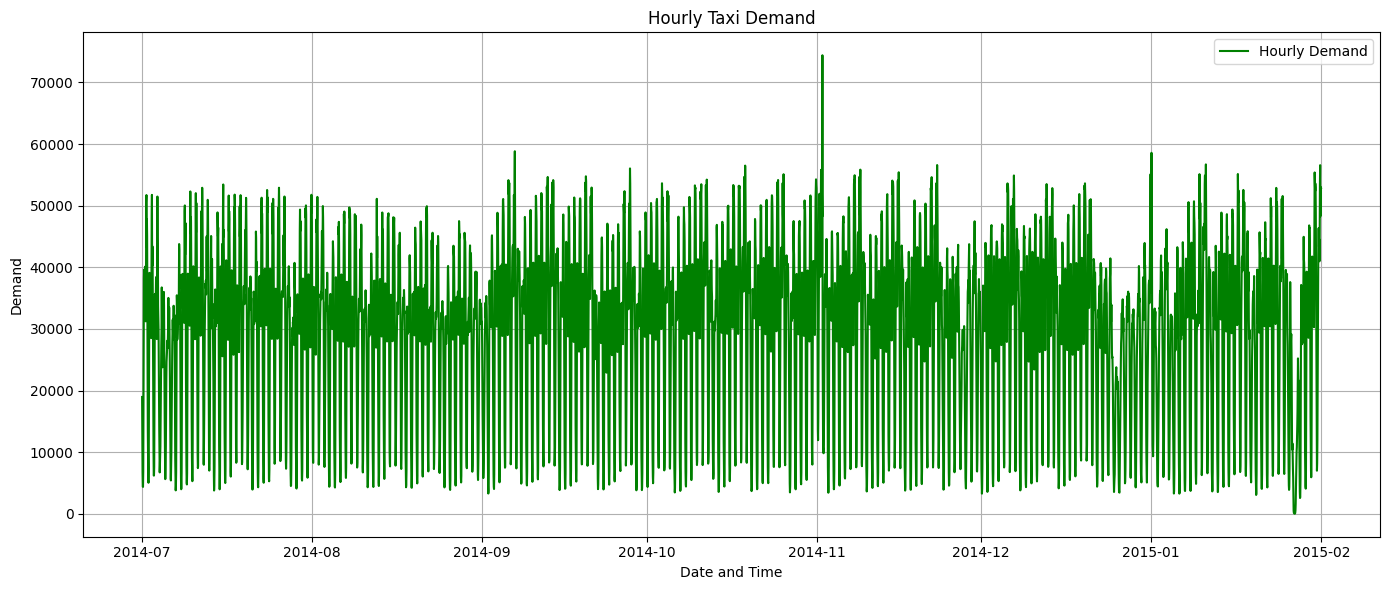

In [ ]:
# Plot for hourly aggregated data
plt.figure(figsize=(14, 6))
plt.plot(df_hour['timestamp'], df_hour['value'], label="Hourly Demand", color="green")
plt.title("Hourly Taxi Demand")
plt.xlabel("Date and Time")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 Plot the seasonal decomposition components (Trend, Seasonal, Residual) from df_day dataframe, also find out the p value from adfuller test. Do you think the df_day is stationary enough (please explain your reasons in comments and report)?


In [ ]:
# Set the timestamp as index
df_day.set_index('timestamp', inplace=True)

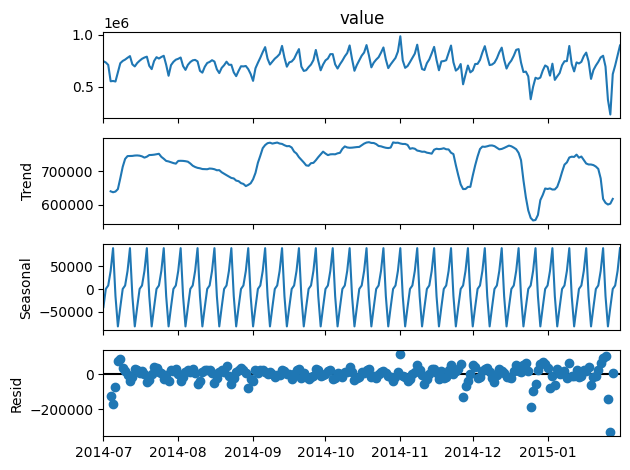

In [ ]:
# Decompose the time series
result = seasonal_decompose(df_day['value'], model='additive')

# Plot the components
result.plot()
plt.show()

In [ ]:
adf_result = adfuller(df_day['value'])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])


ADF Statistic: -3.448094452075355
p-value: 0.009424599993717633
Critical Values: {'1%': -3.4626576734812318, '5%': -2.8757444215841326, '10%': -2.5743412314098753}


The results from the Augmented Dickey-Fuller (ADF) test on the `df_day` dataframe are as follows:

- **ADF Statistic:** -3.448094452075355
- **p-value:** 0.009424599993717633
- **Critical Values:**
  - **1%:** -3.4626576734812318
  - **5%:** -2.8757444215841326
  - **10%:** -2.5743412314098753

**Interpretation**:

1. **ADF Statistic Value**: The more negative this statistic, the stronger the rejection of the null hypothesis (that the series has a unit root and is non-stationary). Here, the ADF statistic is -3.4481.

2. **p-value**: The p-value is a measure of the evidence against a hypothesis. In the context of the ADF test, a small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you would reject the null hypothesis. Here, the p-value is 0.00942, which is less than 0.05.

3. **Critical Values**: The ADF statistic should be compared with the critical values to assess the stationarity of the time series. If the ADF statistic is less (in a more negative sense) than the critical value, we can reject the null hypothesis. Here, the ADF statistic of -3.4481 is less than the 5% critical value of -2.8757 but slightly above the 1% critical value of -3.4627.

**Report**:

Based on the results of the Augmented Dickey-Fuller test, the `df_day` dataframe appears to be stationary for the following reasons:

- The p-value of 0.00942 is less than the typical threshold of 0.05, indicating strong evidence against the null hypothesis of the presence of a unit root. This suggests that the time series is stationary.
  
- The ADF statistic of -3.4481 is more negative than the 5% critical value, further supporting the rejection of the null hypothesis. However, it's worth noting that the ADF statistic is slightly above the 1% critical value, which means that at a 1% confidence level, we might not be able to conclude the stationarity of the series.

In conclusion, while there's strong evidence to consider the `df_day` dataframe stationary at a 5% confidence level, for more rigorous tests or applications, one might need to consider the fact that the ADF statistic is above the 1% critical value.

**Question 2.2**

In this question, we will try to use time series model such as ARIMA and others to build the model(s) for forecasting the future.


• Create the acf and pacf plots for df_day dataframe

<Figure size 1400x600 with 0 Axes>

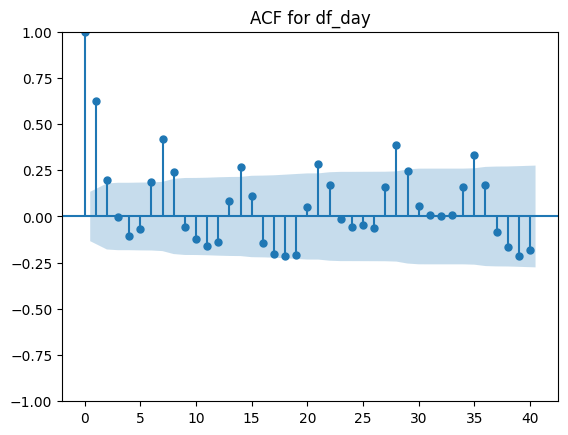

In [ ]:
# ACF plot
plt.figure(figsize=(14, 6))
plot_acf(df_day['value'], lags=40)  # Adjust the lags as needed
plt.title("ACF for df_day")
plt.show()

<Figure size 1400x600 with 0 Axes>

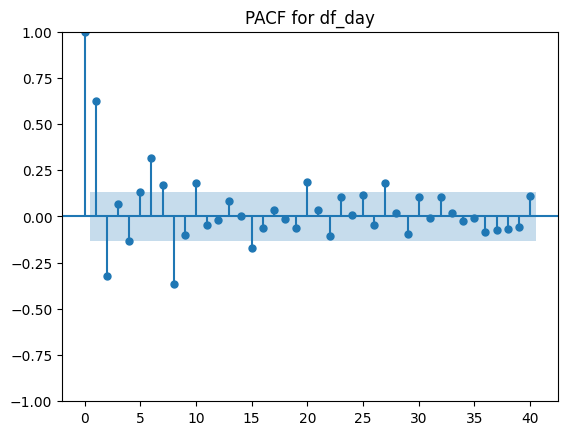

In [ ]:
# PACF plot
plt.figure(figsize=(14, 6))
plot_pacf(df_day['value'], lags=40)  # Adjust the lags as needed
plt.title("PACF for df_day")
plt.show()

 Find the best model with different parameters on ARIMA model. The parameter range for p,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean Abosulate Error from 27 choices based on the time from ”Jul-01-2014” to ”Dec-01-2014”

In [ ]:
df_day.index = pd.DatetimeIndex(df_day.index).to_period('D')


In [ ]:
# 1. Filter the data for the specified date range
df_subset = df_day['Jul-01-2014':'Dec-01-2014']

# Placeholder for the best parameters and best MAE
best_p, best_d, best_q = 0, 1, 2
best_mae = float('inf')  # Initialize with a high value

# Refactoring the grid search
for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                # Fit the ARIMA model with the current parameters
                model = ARIMA(df_subset['demand'], order=(p,d,q))
                model_fit = model.fit(disp=0)

                # Make in-sample predictions (predict the training data)
                predictions = model_fit.fittedvalues

                # Calculate MAE for the current model
                mae = mean_absolute_error(df_subset['demand'], predictions)

                # Update best parameters if current model is better
                if mae < best_mae:
                    best_p, best_d, best_q = p, d, q
                    best_mae = mae

            except:
                continue  # Skip combinations that don't converge or result in errors

print(f"Best ARIMA parameters are (p,d,q)=({best_p}, {best_d}, {best_q}) with MAE={best_mae:.2f}")


Best ARIMA parameters are (p,d,q)=(0, 1, 2) with MAE=inf


In [ ]:
# Convert the PeriodIndex back to a DatetimeIndex
df_day.index = df_day.index.to_timestamp()

# 1. Weekday
# Now you can use the day_name() function to get the full weekday name
df_day['Weekday'] = df_day.index.day_name()

# 2. Hour, Day, Month, Year, and Month_day
# Since it's a daily dataframe, the hour will be constant for all rows. We can set it to 0 or omit it.
df_day['Hour'] = df_day.index.hour
df_day['Day'] = df_day.index.day
df_day['Month'] = df_day.index.month
df_day['Year'] = df_day.index.year
df_day['Month_day'] = df_day.index.day  # Same as 'Day', but we include it for clarity.

# 3. Lag (yesterday's demand value)
# Using the shift() function to get the previous day's value
df_day['Lag'] = df_day['value'].shift(1)

# 4. Rolling_Mean (rolling 7 days mean demand value, minimized period is 1)
# Using the rolling() function with a window of 7 and minimum period of 1
df_day['Rolling_Mean'] = df_day['value'].rolling(window=7, min_periods=1).mean()

# The df_day dataframe now has all the specified new columns


AttributeError: ignored

**Question 2.3**

**In this question, we will detect the anomaly within the df_day dataframe.**

• Create the Weekday column according to the timestamp column in df_day dataframe. The value in Weekday column should be from [’Monday’, ’Tuesday’, ’Wednesday’, ’Thursday’,’Friday’, ’Saturday’, ’Sunday’].



In [ ]:
# Create the Weekday column
df_day['Weekday'] = df_day.index.day_name()

In [ ]:
df_day.head()

,value,Weekday
timestamp,,
2014-07-01,745967,Tuesday
2014-07-02,733640,Wednesday
2014-07-03,710142,Thursday
2014-07-04,552565,Friday
2014-07-05,555470,Saturday


Also create the Hour, Day, Month, Year, Month_day (numeric format on day of the month), Lag (yesterday’s demand value ),  Rolling_Mean (rolling 7 days mean demand value, minimized period is 1) 7 new columns in df_day dataframe according to the timestamp column.


In [ ]:
# Extracting Hour, Day, Month, Year, and Month_day from the index
df_day['Hour'] = df_day.index.hour
df_day['Month_day '] = df_day.index.day
df_day['Month'] = df_day.index.month
df_day['Year'] = df_day.index.year
df_day['Month_day'] = df_day.index.day  # This is the same as the 'Day' column

In [ ]:
df_day.head()

,value,Weekday,Hour,Month_day,Month,Year,Month_day
timestamp,,,,,,,
2014-07-01,745967,Tuesday,0,1,7,2014,1
2014-07-02,733640,Wednesday,0,2,7,2014,2
2014-07-03,710142,Thursday,0,3,7,2014,3
2014-07-04,552565,Friday,0,4,7,2014,4
2014-07-05,555470,Saturday,0,5,7,2014,5


In [ ]:
# Creating the Lag column (previous day's demand value)
df_day['Lag'] = df_day['value'].shift(1)

In [ ]:
df_day.head()

,value,Weekday,Hour,Day,Month,Year,Month_day,Lag
timestamp,,,,,,,,
2014-07-01,745967,Tuesday,0,1,7,2014,1,NaN
2014-07-02,733640,Wednesday,0,2,7,2014,2,745967.0
2014-07-03,710142,Thursday,0,3,7,2014,3,733640.0
2014-07-04,552565,Friday,0,4,7,2014,4,710142.0
2014-07-05,555470,Saturday,0,5,7,2014,5,552565.0


In [ ]:
# Creating the Rolling_Mean column (rolling 7-day mean demand value with a minimum period of 1 day)
df_day['Rolling_Mean'] = df_day['value'].rolling(window=7, min_periods=1).mean()

In [ ]:
df_day.head()

,value,Weekday,Hour,Month_day,Month,Year,Month_day,Rolling_Mean
timestamp,,,,,,,,
2014-07-01,745967,Tuesday,0,1,7,2014,1,745967.000000
2014-07-02,733640,Wednesday,0,2,7,2014,2,739803.500000
2014-07-03,710142,Thursday,0,3,7,2014,3,729916.333333
2014-07-04,552565,Friday,0,4,7,2014,4,685578.500000
2014-07-05,555470,Saturday,0,5,7,2014,5,659556.800000


**• Using Isolation Forest with above crafted features in df_day to find out the date which is identified as ’outlier’.**


In [ ]:
# Import necessary libraries
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df_day['Weekday_encoded'] = le.fit_transform(df_day['Weekday'])

In [ ]:
df_day.head()

,value,Weekday,Hour,Month_day,Month,Year,Month_day,Rolling_Mean,Weekday_encoded
timestamp,,,,,,,,,
2014-07-01,745967,Tuesday,0,1,7,2014,1,745967.000000,5
2014-07-02,733640,Wednesday,0,2,7,2014,2,739803.500000,6
2014-07-03,710142,Thursday,0,3,7,2014,3,729916.333333,4
2014-07-04,552565,Friday,0,4,7,2014,4,685578.500000,0
2014-07-05,555470,Saturday,0,5,7,2014,5,659556.800000,2


In [ ]:
# Drop non-numeric columns if any (like 'Weekday') for the purpose of this model
df_numeric = df_day.drop(columns=['Weekday' ,'Weekday_encoded'], errors='ignore')

In [ ]:
df_numeric.head()

,value,Hour,Month_day,Month,Year,Month_day,Rolling_Mean
timestamp,,,,,,,
2014-07-01,745967,0,1,7,2014,1,745967.000000
2014-07-02,733640,0,2,7,2014,2,739803.500000
2014-07-03,710142,0,3,7,2014,3,729916.333333
2014-07-04,552565,0,4,7,2014,4,685578.500000
2014-07-05,555470,0,5,7,2014,5,659556.800000


In [ ]:
# Handle missing values. Given this is time series data, forward fill might be appropriate
df_numeric.fillna(method='ffill', inplace=True)

In [ ]:
#  Train the Isolation Forest model
# Anomalies are typically a small proportion of the dataset, so let's assume 1% for contamination
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(df_numeric)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
#  Detect anomalies
# The model will return -1 for anomalies and 1 for normal data points
df_day['outlier'] = outliers


# Filter the dataframe to get only the rows marked as outliers
outliers_df = df_day[df_day['outlier'] == -1]

# Print the outlier dates and their corresponding values
for date, row in outliers_df.iterrows():
    print(f"Date: {date}, Demand Value: {row['value']}")

Date: 2015-01-01 00:00:00, Demand Value: 690407
Date: 2015-01-27 00:00:00, Demand Value: 232058
Date: 2015-01-31 00:00:00, Demand Value: 897719
